In [31]:
!pip list | grep sci

datascience                   0.10.6        
scikit-image                  0.16.2        
scikit-learn                  0.22.2.post1  
scipy                         1.4.1         


In [25]:
import xgboost as xgb

xgb.__version__

'0.90'

In [21]:
!pip list -v | grep xgboost

xgboost                       0.90           /usr/local/lib/python3.7/dist-packages pip      


In [1]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/MyDrive/bhl

Mounted at /gdrive
/gdrive/MyDrive/bhl


In [3]:
import pickle

fi_model = './xgboost_model.pkl'
fi_cols = './columns_model.pkl'
with open(fi_cols, 'rb') as f:
  columns = pickle.load(f)
with open(fi_model, 'rb') as f:
  model = pickle.load(f)

In [20]:
import pandas as pd

raw = pd.read_csv('final_train.csv')
y_pred = model.predict(raw[columns])

from sklearn.metrics import accuracy_score
accuracy_score(raw['Activity'], y_pred)

0.905285946238499

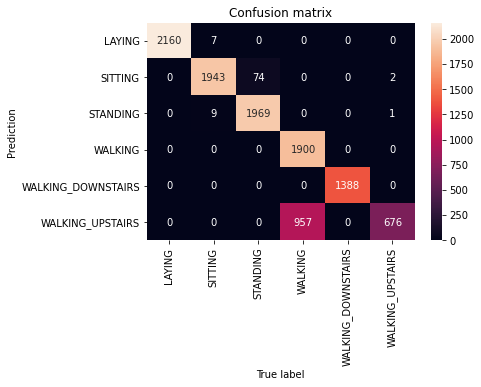

In [13]:
def plot_cm(test_y, y_pred):
  import numpy as np
  import seaborn as sns
  import pandas as pd
  from sklearn import metrics
  labels = sorted(np.unique(test_y))
  cm = metrics.confusion_matrix(test_y, y_pred)
  df = pd.DataFrame(cm, index = labels, columns = labels)
  ax = sns.heatmap(df, annot=True, fmt='d')
  ax.set_title('Confusion matrix')
  ax.set_xlabel('True label')
  ax.set_ylabel('Prediction')
  return ax

plot_cm(raw['Activity'], y_pred)